<a href="https://colab.research.google.com/github/duylebkHCM/Kaggle-Notebooks/blob/master/ClassifyTrafficSign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%cd drive/My\ Drive/WORKSPACE/HK192/AI/AI_COLAB

/content/drive/My Drive/WORKSPACE/HK192/AI/AI_COLAB


In [3]:
!ls

COCO-GAN		    PretrainedModel  TrainignMonitor   YOLO
FaceRecognitionwithFaceNet  ProtonX	     TransferLearning


In [4]:
%cd ProtonX

/content/drive/My Drive/WORKSPACE/HK192/AI/AI_COLAB/ProtonX


In [0]:
link = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip'

In [6]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=2b55f20ad94b5b018af8d2c2f838693841cdb332d4d2cc622f872d19d527c2b1
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [7]:
import wget
wget.download(link)

'traffic-signs-data (1).zip'

In [0]:
data = './'

In [9]:
!unzip -q traffic-signs-data.zip -d $data

replace ./test.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./train.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./valid.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [0]:
train_data = data + 'train.p'
valid_data = data + 'valid.p'
test_data = data + 'test.p'

In [0]:
import pickle
with open(train_data, mode = 'rb') as f:
  train = pickle.load(f)
with open (valid_data,  mode = 'rb') as f:
  valid = pickle.load(f)
with open(test_data, mode = 'rb') as f:
  test = pickle.load(f)

In [12]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
          [ 29,  25,  22]],
 
         [[ 28,  23,  23],
       

In [0]:
trainX = train['features']
trainY = train['labels']

In [14]:
trainX.shape

(34799, 32, 32, 3)

In [15]:
trainY.shape

(34799,)

In [16]:
trainX[0]

array([[[28, 25, 24],
        [27, 24, 23],
        [27, 24, 22],
        ...,
        [32, 28, 24],
        [31, 27, 25],
        [31, 27, 26]],

       [[29, 26, 25],
        [27, 25, 23],
        [27, 25, 23],
        ...,
        [32, 28, 24],
        [31, 27, 24],
        [30, 27, 25]],

       [[28, 26, 26],
        [27, 25, 23],
        [26, 25, 23],
        ...,
        [32, 28, 24],
        [31, 27, 24],
        [30, 27, 25]],

       ...,

       [[27, 24, 23],
        [28, 25, 24],
        [30, 25, 24],
        ...,
        [27, 24, 23],
        [28, 24, 22],
        [29, 25, 22]],

       [[28, 23, 23],
        [29, 24, 24],
        [31, 25, 24],
        ...,
        [27, 24, 23],
        [28, 24, 22],
        [28, 24, 21]],

       [[29, 23, 23],
        [30, 24, 24],
        [32, 24, 23],
        ...,
        [27, 24, 22],
        [27, 23, 21],
        [26, 22, 20]]], dtype=uint8)

In [17]:
trainX[0].shape

(32, 32, 3)

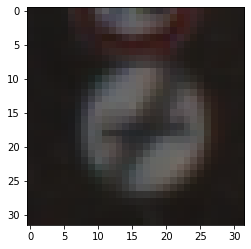

In [18]:
import matplotlib.pyplot as plt
plt.imshow(trainX[0])


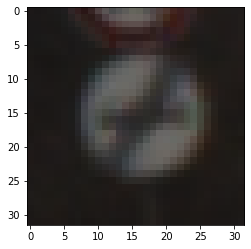

In [19]:
plt.imshow(trainX[1])

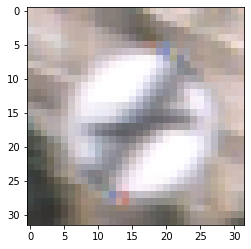

In [20]:
plt.imshow(trainX[50])

In [21]:
trainY[50]

41

In [0]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}

In [23]:
classNames[trainY[50]]

'End of no passing'

In [0]:
from sklearn.utils import shuffle

trainX, trainY = shuffle(trainX, trainY)

In [25]:
trainX[0]

array([[[19, 21, 26],
        [22, 25, 30],
        [25, 27, 31],
        ...,
        [26, 25, 27],
        [22, 25, 27],
        [29, 31, 33]],

       [[18, 20, 25],
        [22, 26, 31],
        [31, 33, 36],
        ...,
        [26, 26, 29],
        [25, 27, 31],
        [26, 28, 30]],

       [[24, 27, 29],
        [27, 30, 32],
        [29, 31, 32],
        ...,
        [28, 29, 33],
        [27, 28, 31],
        [27, 28, 29]],

       ...,

       [[19, 21, 22],
        [21, 25, 24],
        [23, 26, 24],
        ...,
        [27, 24, 22],
        [27, 25, 24],
        [26, 23, 24]],

       [[25, 24, 25],
        [21, 23, 24],
        [20, 23, 25],
        ...,
        [25, 28, 26],
        [27, 27, 27],
        [26, 26, 26]],

       [[23, 22, 21],
        [21, 24, 24],
        [20, 24, 26],
        ...,
        [25, 28, 25],
        [26, 26, 24],
        [24, 25, 24]]], dtype=uint8)

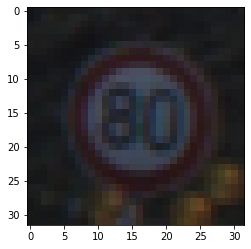

In [26]:
plt.imshow(trainX[0])

In [0]:
validX = valid['features']
validY = valid['labels']

In [0]:
testX = test['features']
testY = test['labels']

In [0]:
trainX = trainX.astype('float')/255.0
validX = validX.astype('float')/255.0
testX = testX.astype('float')/255.0

In [30]:
trainX[0]

array([[[0.0745098 , 0.08235294, 0.10196078],
        [0.08627451, 0.09803922, 0.11764706],
        [0.09803922, 0.10588235, 0.12156863],
        ...,
        [0.10196078, 0.09803922, 0.10588235],
        [0.08627451, 0.09803922, 0.10588235],
        [0.11372549, 0.12156863, 0.12941176]],

       [[0.07058824, 0.07843137, 0.09803922],
        [0.08627451, 0.10196078, 0.12156863],
        [0.12156863, 0.12941176, 0.14117647],
        ...,
        [0.10196078, 0.10196078, 0.11372549],
        [0.09803922, 0.10588235, 0.12156863],
        [0.10196078, 0.10980392, 0.11764706]],

       [[0.09411765, 0.10588235, 0.11372549],
        [0.10588235, 0.11764706, 0.1254902 ],
        [0.11372549, 0.12156863, 0.1254902 ],
        ...,
        [0.10980392, 0.11372549, 0.12941176],
        [0.10588235, 0.10980392, 0.12156863],
        [0.10588235, 0.10980392, 0.11372549]],

       ...,

       [[0.0745098 , 0.08235294, 0.08627451],
        [0.08235294, 0.09803922, 0.09411765],
        [0.09019608, 0

In [0]:
from sklearn.preprocessing import LabelBinarizer

In [0]:
lb = LabelBinarizer()

In [0]:
trainY = lb.fit_transform(trainY)
validY = lb.fit_transform(validY)

In [34]:
validY[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [35]:
trainY[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [0]:
model = Sequential()

In [0]:
width = 32
height = 32
channel = 3

In [0]:
shape = (width, height, channel)

In [0]:
model.add(Conv2D(32, (3,3), padding = 'same', input_shape =shape))

In [0]:
model.add(Activation('relu'))

In [0]:
model.add(BatchNormalization())

In [0]:
model.add(Conv2D(32, (3,3), padding = 'same'))

In [0]:
model.add(Activation('relu'))

In [0]:
model.add(BatchNormalization())

In [0]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
model.add(Conv2D(64, (3,3), padding = 'same'))

In [0]:
model.add(Activation('relu'))

In [0]:
model.add(BatchNormalization())

In [0]:
model.add(Conv2D(64, (3,3), padding = 'same'))

In [0]:
model.add(Activation('relu'))

In [0]:
model.add(BatchNormalization())

In [0]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
model.add(Flatten())

In [0]:
model.add(Dense(512))

In [0]:
model.add(Activation('relu'))

In [0]:
model.add(BatchNormalization())

In [0]:
model.add(Dense(43))

In [0]:
model.add(Activation('softmax'))

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0

In [0]:
aug = ImageDataGenerator(rotation_range=0.1, zoom_range=0.15, width_shift_range= 0.2, height_shift_range=0.2, horizontal_flip=True)

In [0]:
learning_rate = 0.01

In [0]:
epochs = 10
batch_size = 64

In [0]:
opt = SGD(learning_rate=learning_rate, momentum=0.9)

In [0]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [66]:
print('[INFO] START TRAINING...')
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size), validation_data=(validX, validY), steps_per_epoch=trainX.shape[0]/batch_size, epochs = epochs, verbose = 1)

[INFO] START TRAINING...
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
544/543 [==============================] - 18s 33ms/step - loss: 1.9179 - accuracy: 0.4404 - val_loss: 2.0593 - val_accuracy: 0.4395
Epoch 2/10
544/543 [==============================] - 18s 32ms/step - loss: 0.7214 - accuracy: 0.7614 - val_loss: 1.0037 - val_accuracy: 0.7111
Epoch 3/10
544/543 [==============================] - 18s 33ms/step - loss: 0.3356 - accuracy: 0.8912 - val_loss: 0.8468 - val_accuracy: 0.7465
Epoch 4/10
544/543 [==============================] - 18s 33ms/step - loss: 0.2069 - accuracy: 0.9327 - val_loss: 1.0260 - val_accuracy: 0.7388
Epoch 5/10
544/543 [==============================] - 18s 33ms/step - loss: 0.1405 - accuracy: 0.9541 - val_loss: 0.6281 - val_accuracy: 0.8433
Epoch 6/10
544/543 [==============================] - 18s 33ms/step - loss: 0.1099 - accuracy: 0.9655 - val_loss: 0.5843 - val_accuracy: 0.8460
Epoch 7/10
544/543 [===============

In [0]:
model.save('duynet.h5')

In [0]:
predictions = model.predict(testX, batch_size=batch_size)

In [91]:
predictions

array([[5.9433015e-14, 1.0125517e-15, 1.3437057e-10, ..., 4.4042718e-13,
        3.8561511e-12, 8.4140655e-12],
       [1.6639912e-06, 9.9989223e-01, 3.0252550e-06, ..., 1.9230056e-08,
        9.8474262e-10, 2.4057305e-09],
       [6.8200350e-12, 3.3836693e-14, 2.9657718e-08, ..., 1.7050650e-09,
        4.5837990e-11, 4.2560734e-12],
       ...,
       [1.4289883e-07, 5.9447135e-04, 1.0033657e-02, ..., 5.5537421e-06,
        1.0275306e-03, 3.7873127e-03],
       [7.7256180e-07, 4.9735841e-05, 6.4101546e-06, ..., 8.5900348e-07,
        1.9416994e-08, 1.6201344e-07],
       [4.5931228e-13, 6.4384340e-12, 8.9364254e-12, ..., 6.0546801e-10,
        1.3395790e-10, 3.2946080e-08]], dtype=float32)

In [0]:
predictions = predictions.argmax(axis = 1)

In [93]:
predictions

array([16,  1, 38, ...,  6,  7, 10])

In [0]:
predictions = predictions.reshape(-1, 1)

In [0]:
testY = lb.transform(testY)

In [108]:
testY.shape

(12630, 43)

In [0]:
testY = testY.argmax(axis = 1)

In [0]:
classNames_new = [classNames[i] for i in range(len(classNames))]

In [101]:
classNames_new

['Speed limit (20km/h)',
 'Speed limit (30km/h)',
 'Speed limit (50km/h)',
 'Speed limit (60km/h)',
 'Speed limit (70km/h)',
 'Speed limit (80km/h)',
 'End of speed limit (80km/h)',
 'Speed limit (100km/h)',
 'Speed limit (120km/h)',
 'No passing',
 'No passing for vehicles over 3.5 metric tons',
 'Right-of-way at the next intersection',
 'Priority road',
 'Yield',
 'Stop',
 'No vehicles',
 'Vehicles over 3.5 metric tons prohibited',
 'No entry',
 'General caution',
 'Dangerous curve to the left',
 'Dangerous curve to the right',
 'Double curve',
 'Bumpy road',
 'Slippery road',
 'Road narrows on the right',
 'Road work',
 'Traffic signals',
 'Pedestrians',
 'Children crossing',
 'Bicycles crossing',
 'Beware of ice/snow',
 'Wild animals crossing',
 'End of all speed and passing limits',
 'Turn right ahead',
 'Turn left ahead',
 'Ahead only',
 'Go straight or right',
 'Go straight or left',
 'Keep right',
 'Keep left',
 'Roundabout mandatory',
 'End of no passing',
 'End of no passing 

In [110]:
from sklearn.metrics import classification_report

print(classification_report(predictions, testY, target_names=classNames_new))

                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)       0.88      0.83      0.85        64
                              Speed limit (30km/h)       0.94      0.84      0.89       807
                              Speed limit (50km/h)       0.86      0.84      0.85       771
                              Speed limit (60km/h)       0.97      0.82      0.89       528
                              Speed limit (70km/h)       0.92      0.94      0.93       641
                              Speed limit (80km/h)       0.80      0.94      0.87       538
                       End of speed limit (80km/h)       0.82      1.00      0.90       123
                             Speed limit (100km/h)       0.92      0.90      0.91       458
                             Speed limit (120km/h)       0.90      0.95      0.93       427
                                        No passing       0.99      0.95      0.

In [111]:
testX.shape

(12630, 32, 32, 3)

In [112]:
predictions[1]

array([1])

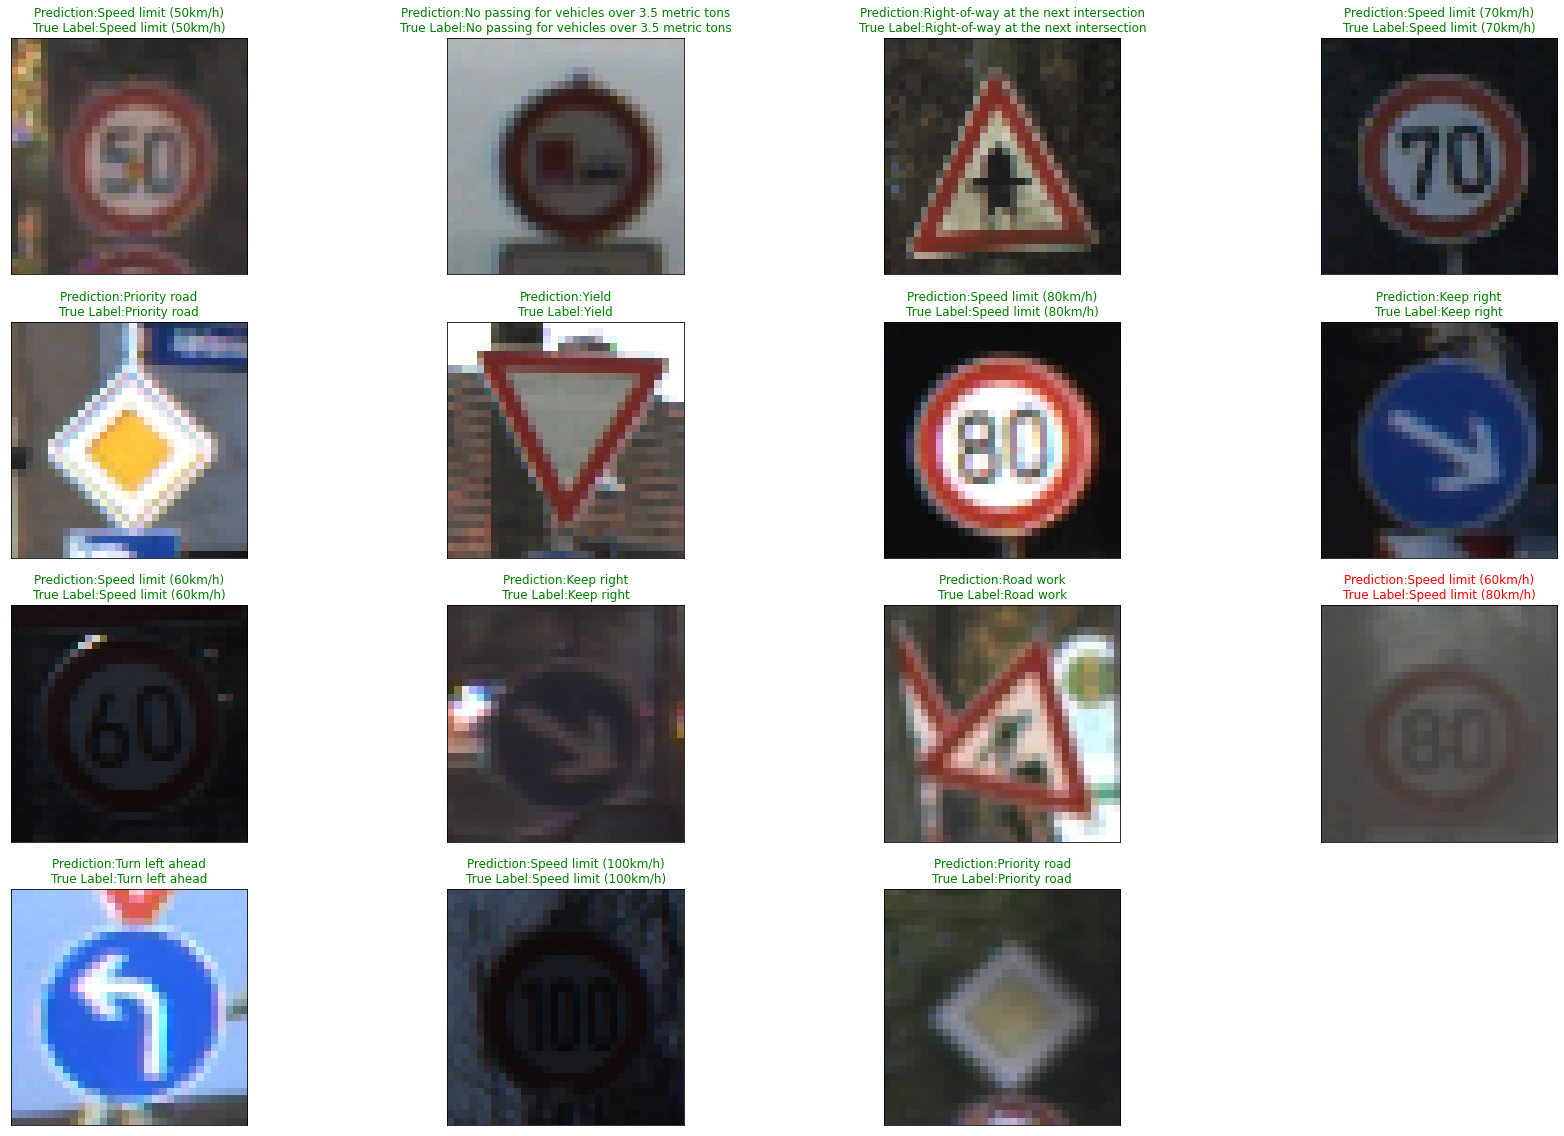

In [119]:
random_number = 15

import numpy as np
np.random.seed(42)
fig = plt.figure(figsize = (30, 20))

for i, idx in enumerate(np.random.choice(testX.shape[0], size = random_number, replace = False)):
  ax = fig.add_subplot(4,4,i+1, xticks = [], yticks = [])
  ax.imshow(testX[idx])
  pred_idx = predictions[idx]
  true_idx = testY[idx]
  ax.set_title('Prediction:{}\nTrue Label:{}'.format(classNames_new[int(pred_idx)], classNames_new[int(true_idx)]), color = ('green' if pred_idx == true_idx else 'red'))